In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

In [ ]:
from process_data import make_ptregression_data

input_path = "data/train.npy"
arr = np.load(input_path)
x_orig,x_smear,mll_smear = make_ptregression_data(arr)

(array([5.0000e+00, 5.7000e+01, 8.2000e+01, 9.7000e+01, 1.2200e+02,
        1.6000e+02, 1.6200e+02, 2.1000e+02, 2.6300e+02, 2.9900e+02,
        3.8400e+02, 5.3600e+02, 8.5600e+02, 1.6310e+03, 2.8890e+03,
        4.7060e+03, 6.9670e+03, 9.1790e+03, 1.0803e+04, 1.0723e+04,
        9.5340e+03, 7.9240e+03, 5.7160e+03, 3.9910e+03, 2.4480e+03,
        1.4700e+03, 8.7200e+02, 5.0800e+02, 3.7000e+02, 2.3900e+02,
        1.4600e+02, 1.2200e+02, 9.7000e+01, 8.2000e+01, 5.2000e+01,
        4.1000e+01, 5.2000e+01, 3.7000e+01, 3.2000e+01, 2.0000e+01,
        2.3000e+01, 3.7000e+01, 2.6000e+01, 2.0000e+01, 1.7000e+01,
        1.2000e+01, 1.1000e+01, 1.4000e+01, 1.1000e+01, 1.1000e+01]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9

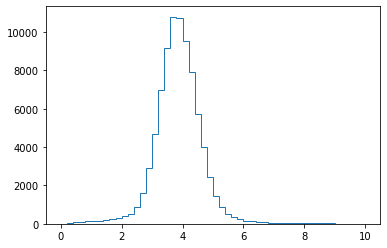

In [3]:
plt.hist(mll_smear,bins=50,range=[0.,10.],histtype='step',label='smeared distribution')

In [4]:
mu = tf.Variable(0.5,dtype=tf.float32)
beta = tf.Variable(0.5,dtype=tf.float32)

def log_loss(x,mu,beta):
    diff = x - mu
    return tf.reduce_mean(-tf.math.log(beta) + 0.5 * tf.math.square(tf.math.multiply(beta,diff)))

nepoch = 10000
opt = tf.keras.optimizers.Adam()
for iep in range(nepoch):
    with tf.GradientTape() as tape:
        ll = log_loss(mll_smear,mu,beta)
    grad = tape.gradient(ll,[mu,beta])
    opt.apply_gradients(zip(grad,[mu,beta]))
print([mu,beta])

[<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.795981>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.40494174>]


In [5]:
eps = K.random_normal(shape=(mll_smear.shape[0],))
mll_fit = mu + eps / beta

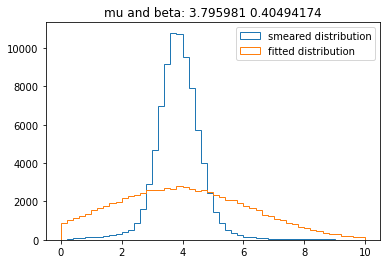

In [12]:
plt.hist(mll_smear,bins=50,range=[0.,10.],histtype='step',label='smeared distribution')
plt.hist(mll_fit.numpy(),bins=50,range=[0.,10.],histtype='step',label='fitted distribution')
plt.title("mu and beta: "+str(mu.numpy())+" "+str(beta.numpy()))
plt.legend(loc='best')